# Cryptocurrency price predictor

## Introduction

The primary goal of this project was to exhibit my competency with data manipulation, graphing and applying several machine learning algorithms. I make use of the following packages:

1. pandas
2. numpy
3. os
4. sklearn
5. seaborn
6. matplotlib
7. xgboost

The secondary goal of this project was to determine whether one is able to use machine learning to determine whether the price of any  cryptocurrency (coin) can be predicted to increase or decrease over the next hour. The data used for predicitons was the price change of 32 coins (including the coin being predicted) over the previous hour. I did not think that one use the mentioned data to make accurate predicitons, believing that the price changes in coins are affect by too many external factors to be able to be predicted using this dataset, but thought that it would be interesting to create this project nonetheless.

## Method

I imported all packages to be used in the extraction and manipulation of the data frames.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

I created a dictionary of all of the trading data of all of the coins using a loop which imported all of the csv files with historical trading data of said coins from a folder. I then added a column which depicts the change in price over the last hour and then another column depicting whether the price change was a price increase (represented by a 1) or a price decrease (represented by a 0), I labelled this column 'increase'.

In [2]:
keys = ['AAVE','ADA','BAT','BNB','BTC','BTT','CELR',
         'CVC','DAI','DASH','DOT','EOS','ETC','ETH',
         'FIL','ICP','ICX','LINK','LRC','LTC','MATIC',
         'MKR','NEO','ONE','PAX','QTUM','SC','SOL','TRX',
         'TUSD','UNI','USDC','VET','XLM','XMR','XRP','ZEC']


coins = dict.fromkeys(keys)

def increase_or_decrease (row):
    if row['change'] >= 0:
        return 1
    else:
        return 0

counter=0

for filename in os.listdir(r'C:\Users\chris\Desktop\Coding\python_work\Projects\Crypto\Coin_data'):
    file_path=os.path.join(r'C:\Users\chris\Desktop\Coding\python_work\Projects\Crypto\Coin_data',filename)
    csv=pd.read_csv(file_path, skiprows=[0])
    csv=csv.drop(csv.columns[[1,4,5,7,8,9]], axis = 1)
    csv['change']=csv['close']-csv['open']
    csv['increase']= csv.apply (lambda row: increase_or_decrease(row), axis=1)
    coins[keys[counter]]=csv
    counter +=1

In [3]:
display(coins['AAVE'])

,unix,symbol,open,close,change,increase
0,1642636800000,AAVE/USDT,210.400,210.800,0.400,1
1,1642633200000,AAVE/USDT,213.900,210.200,-3.700,0
2,1642629600000,AAVE/USDT,212.400,214.200,1.800,1
3,1642626000000,AAVE/USDT,212.700,212.500,-0.200,0
4,1642622400000,AAVE/USDT,214.900,212.600,-2.300,0
...,...,...,...,...,...,...
6438,1619438400000,AAVE/USDT,403.660,396.625,-7.035,0
6439,1619434800000,AAVE/USDT,398.435,403.663,5.228,1
6440,1619431200000,AAVE/USDT,399.064,398.223,-0.841,0
6441,1619427600000,AAVE/USDT,384.180,398.933,14.753,1


I viewed the data frame shapes and contructed a quick bar plot to decide which coins had enough historical trading data to be of use (looking at the shapes and bar graph i decided that 6443 rows of data would be my cut-off, although 12848 could have been another good choice) and then deleted the data frames that were too small from the dictionary.

In [4]:
row_numbers=[]
for coin in coins.values():
    display(coin.shape)
    row_numbers.append(coin.shape[0])

(6443, 6)

(12848, 6)

(12848, 6)

(12848, 6)

(41432, 6)

(12779, 6)

(12848, 6)

(10428, 6)

(140, 6)

(12848, 6)

(6443, 6)

(12848, 6)

(12848, 6)

(41432, 6)

(6443, 6)

(6088, 6)

(5582, 6)

(12848, 6)

(10980, 6)

(38606, 6)

(12848, 6)

(6443, 6)

(39158, 6)

(12848, 6)

(9589, 6)

(12848, 6)

(6780, 6)

(6443, 6)

(12848, 6)

(12848, 6)

(6443, 6)

(12848, 6)

(6443, 6)

(12848, 6)

(12848, 6)

(12848, 6)

(12848, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

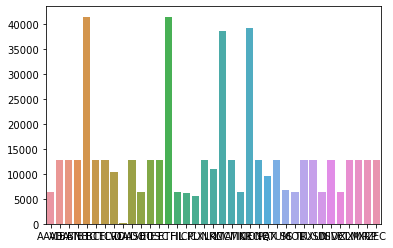

In [5]:
row_series=pd.Series(row_numbers)
keys_series=pd.Series(keys)
sns.barplot(x=keys_series, y=row_series)
plt.show

In [6]:
del coins['DAI']
del coins['ICP']
del coins['ICX']
del coins['TUSD']
del coins['USDC']

In [7]:

for coin in coins.values():
    display(coin.shape)    

(6443, 6)

(12848, 6)

(12848, 6)

(12848, 6)

(41432, 6)

(12779, 6)

(12848, 6)

(10428, 6)

(12848, 6)

(6443, 6)

(12848, 6)

(12848, 6)

(41432, 6)

(6443, 6)

(12848, 6)

(10980, 6)

(38606, 6)

(12848, 6)

(6443, 6)

(39158, 6)

(12848, 6)

(9589, 6)

(12848, 6)

(6780, 6)

(6443, 6)

(12848, 6)

(6443, 6)

(6443, 6)

(12848, 6)

(12848, 6)

(12848, 6)

(12848, 6)

I then made a single data frame which included all of the price changes over the previous hour and included a datetime column (converted from the unix column)

In [8]:
coins_keys = list(coins.keys())
print(coins_keys)
counter=0

['AAVE', 'ADA', 'BAT', 'BNB', 'BTC', 'BTT', 'CELR', 'CVC', 'DASH', 'DOT', 'EOS', 'ETC', 'ETH', 'FIL', 'LINK', 'LRC', 'LTC', 'MATIC', 'MKR', 'NEO', 'ONE', 'PAX', 'QTUM', 'SC', 'SOL', 'TRX', 'UNI', 'VET', 'XLM', 'XMR', 'XRP', 'ZEC']


In [9]:
change_df = coins['AAVE']
change_df =pd.DataFrame(change_df['unix'])

In [10]:
for coin in coins.values():
    column=pd.DataFrame(coin['change'])
    change_df[coins_keys[counter]]=column
    counter+=1


In [11]:
change_df.head()

,unix,AAVE,ADA,BAT,BNB,BTC,BTT,CELR,CVC,DASH,...,QTUM,SC,SOL,TRX,UNI,VET,XLM,XMR,XRP,ZEC
0,1642636800000,0.4,-0.003,0.0037,2.1,93.18,0.000037,0.00031,-0.0003,0.4,...,0.031,0.00000,0.55,0.00027,0.05,0.00058,0.0000,-0.4,0.0018,0.3
1,1642633200000,-3.7,-0.014,-0.0160,-6.6,-316.88,-0.000002,-0.00113,-0.0025,-1.5,...,-0.058,-0.00012,-1.78,-0.00007,-0.29,-0.00098,-0.0024,-1.6,-0.0054,-1.9
2,1642629600000,1.8,0.020,0.0062,0.7,264.66,0.000016,-0.00013,0.0009,0.6,...,0.052,0.00008,1.25,0.00033,0.07,0.00050,0.0011,0.8,0.0034,1.4
3,1642626000000,-0.2,-0.004,-0.0012,0.6,82.87,0.000052,-0.00024,0.0000,0.3,...,-0.001,0.00002,0.32,0.00003,0.06,-0.00009,0.0006,-0.2,0.0016,0.2
4,1642622400000,-2.3,-0.030,-0.0086,-4.1,-241.05,0.000044,-0.00186,-0.0022,-1.2,...,-0.044,-0.00018,-1.31,0.00011,-0.19,-0.00071,-0.0013,-2.4,-0.0022,-0.8


In [12]:
change_df['date'] = pd.to_datetime(change_df['unix'],unit='ms')
change_df.head()

,unix,AAVE,ADA,BAT,BNB,BTC,BTT,CELR,CVC,DASH,...,SC,SOL,TRX,UNI,VET,XLM,XMR,XRP,ZEC,date
0,1642636800000,0.4,-0.003,0.0037,2.1,93.18,0.000037,0.00031,-0.0003,0.4,...,0.00000,0.55,0.00027,0.05,0.00058,0.0000,-0.4,0.0018,0.3,2022-01-20 00:00:00
1,1642633200000,-3.7,-0.014,-0.0160,-6.6,-316.88,-0.000002,-0.00113,-0.0025,-1.5,...,-0.00012,-1.78,-0.00007,-0.29,-0.00098,-0.0024,-1.6,-0.0054,-1.9,2022-01-19 23:00:00
2,1642629600000,1.8,0.020,0.0062,0.7,264.66,0.000016,-0.00013,0.0009,0.6,...,0.00008,1.25,0.00033,0.07,0.00050,0.0011,0.8,0.0034,1.4,2022-01-19 22:00:00
3,1642626000000,-0.2,-0.004,-0.0012,0.6,82.87,0.000052,-0.00024,0.0000,0.3,...,0.00002,0.32,0.00003,0.06,-0.00009,0.0006,-0.2,0.0016,0.2,2022-01-19 21:00:00
4,1642622400000,-2.3,-0.030,-0.0086,-4.1,-241.05,0.000044,-0.00186,-0.0022,-1.2,...,-0.00018,-1.31,0.00011,-0.19,-0.00071,-0.0013,-2.4,-0.0022,-0.8,2022-01-19 20:00:00


I then created another dataframe of the increase columns of all of the coins and added a datetime column. I then inserted a row at index 0 as a spacer. This means that when the rows of this data frame are compared to the change_df during the machine learning phase, the data of the preceding hour (predictors) is being compared to the increase or decrease of the proceeding hour (outcome).

In [13]:
increase_df = coins['AAVE']
increase_df=pd.DataFrame(increase_df['unix'])
counter=0

for coin in coins.values():
    column=pd.DataFrame(coin['increase'])
    increase_df[coins_keys[counter]]=column
    counter+=1

In [14]:
increase_df['date'] = pd.to_datetime(increase_df['unix'],unit='ms')
increase_df=increase_df.drop(['unix'], axis='columns')

In [15]:
increase_df.head()

,AAVE,ADA,BAT,BNB,BTC,BTT,CELR,CVC,DASH,DOT,...,SC,SOL,TRX,UNI,VET,XLM,XMR,XRP,ZEC,date
0,1,0,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,2022-01-20 00:00:00
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022-01-19 23:00:00
2,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2022-01-19 22:00:00
3,0,0,0,1,1,1,0,1,1,1,...,1,1,1,1,0,1,0,1,1,2022-01-19 21:00:00
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2022-01-19 20:00:00


In [16]:
increase_df.loc[-1] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'2022-01-20 01:00:00'] 
increase_df.index = increase_df.index + 1  
increase_df = increase_df.sort_index() 

In [17]:
increase_df['date'] = pd.to_datetime(increase_df['date'])
increase_df.dtypes

AAVE              int64
ADA               int64
BAT               int64
BNB               int64
BTC               int64
BTT               int64
CELR              int64
CVC               int64
DASH              int64
DOT               int64
EOS               int64
ETC               int64
ETH               int64
FIL               int64
LINK              int64
LRC               int64
LTC               int64
MATIC             int64
MKR               int64
NEO               int64
ONE               int64
PAX               int64
QTUM              int64
SC                int64
SOL               int64
TRX               int64
UNI               int64
VET               int64
XLM               int64
XMR               int64
XRP               int64
ZEC               int64
date     datetime64[ns]
dtype: object

In [18]:
increase_df.head()

,AAVE,ADA,BAT,BNB,BTC,BTT,CELR,CVC,DASH,DOT,...,SC,SOL,TRX,UNI,VET,XLM,XMR,XRP,ZEC,date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022-01-20 01:00:00
1,1,0,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,2022-01-20 00:00:00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022-01-19 23:00:00
3,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2022-01-19 22:00:00
4,0,0,0,1,1,1,0,1,1,1,...,1,1,1,1,0,1,0,1,1,2022-01-19 21:00:00


In [19]:
change_df.head()

,unix,AAVE,ADA,BAT,BNB,BTC,BTT,CELR,CVC,DASH,...,SC,SOL,TRX,UNI,VET,XLM,XMR,XRP,ZEC,date
0,1642636800000,0.4,-0.003,0.0037,2.1,93.18,0.000037,0.00031,-0.0003,0.4,...,0.00000,0.55,0.00027,0.05,0.00058,0.0000,-0.4,0.0018,0.3,2022-01-20 00:00:00
1,1642633200000,-3.7,-0.014,-0.0160,-6.6,-316.88,-0.000002,-0.00113,-0.0025,-1.5,...,-0.00012,-1.78,-0.00007,-0.29,-0.00098,-0.0024,-1.6,-0.0054,-1.9,2022-01-19 23:00:00
2,1642629600000,1.8,0.020,0.0062,0.7,264.66,0.000016,-0.00013,0.0009,0.6,...,0.00008,1.25,0.00033,0.07,0.00050,0.0011,0.8,0.0034,1.4,2022-01-19 22:00:00
3,1642626000000,-0.2,-0.004,-0.0012,0.6,82.87,0.000052,-0.00024,0.0000,0.3,...,0.00002,0.32,0.00003,0.06,-0.00009,0.0006,-0.2,0.0016,0.2,2022-01-19 21:00:00
4,1642622400000,-2.3,-0.030,-0.0086,-4.1,-241.05,0.000044,-0.00186,-0.0022,-1.2,...,-0.00018,-1.31,0.00011,-0.19,-0.00071,-0.0013,-2.4,-0.0022,-0.8,2022-01-19 20:00:00


I then created a dictionary of data frames of each of the coins that can be used to train the machine learning models I wanted to use. I did this by assigning copies of the change_df to each dicitonary key and then appending to each of these copies the column associated with each coin from the increase_df. This appended column I labelled 'y' as it was the outcome (y variable) data to be used in the machine learning phase of the project.

In [20]:
ml_dfs=dict.fromkeys(coins_keys)
ml_dfs

{'AAVE': None,
 'ADA': None,
 'BAT': None,
 'BNB': None,
 'BTC': None,
 'BTT': None,
 'CELR': None,
 'CVC': None,
 'DASH': None,
 'DOT': None,
 'EOS': None,
 'ETC': None,
 'ETH': None,
 'FIL': None,
 'LINK': None,
 'LRC': None,
 'LTC': None,
 'MATIC': None,
 'MKR': None,
 'NEO': None,
 'ONE': None,
 'PAX': None,
 'QTUM': None,
 'SC': None,
 'SOL': None,
 'TRX': None,
 'UNI': None,
 'VET': None,
 'XLM': None,
 'XMR': None,
 'XRP': None,
 'ZEC': None}

In [21]:
counter=0
for key in ml_dfs.keys():
    ml_dfs[key]=change_df.copy()
    ml_dfs[key]=ml_dfs[key].drop(['date'], axis='columns')
    ml_dfs[key]=ml_dfs[key].drop(['unix'], axis='columns')
    sheet=ml_dfs[key]
    sheet['y']=increase_df[key]
    sheet=sheet.drop([sheet.index[0]])
    ml_dfs[key]=sheet.copy()
    counter+=1
    


In [22]:
ml_dfs['AAVE'].head()

,AAVE,ADA,BAT,BNB,BTC,BTT,CELR,CVC,DASH,DOT,...,SC,SOL,TRX,UNI,VET,XLM,XMR,XRP,ZEC,y
1,-3.7,-0.014,-0.0160,-6.6,-316.88,-0.000002,-0.00113,-0.0025,-1.5,-0.24,...,-0.00012,-1.78,-0.00007,-0.29,-0.00098,-0.0024,-1.6,-0.0054,-1.9,1
2,1.8,0.020,0.0062,0.7,264.66,0.000016,-0.00013,0.0009,0.6,0.18,...,0.00008,1.25,0.00033,0.07,0.00050,0.0011,0.8,0.0034,1.4,0
3,-0.2,-0.004,-0.0012,0.6,82.87,0.000052,-0.00024,0.0000,0.3,0.03,...,0.00002,0.32,0.00003,0.06,-0.00009,0.0006,-0.2,0.0016,0.2,1
4,-2.3,-0.030,-0.0086,-4.1,-241.05,0.000044,-0.00186,-0.0022,-1.2,-0.21,...,-0.00018,-1.31,0.00011,-0.19,-0.00071,-0.0013,-2.4,-0.0022,-0.8,0
5,-1.3,-0.031,-0.0033,-0.7,-131.21,0.000013,-0.00033,-0.0007,-0.2,-0.08,...,-0.00005,-0.16,-0.00038,-0.05,-0.00033,-0.0004,-2.9,0.0017,-0.3,0


I then imported all of the models and other machine learning tools that I wished to use.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
gnb=GaussianNB()
xgb=xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc')
models=[knc,rfc,gnb,xgb]

I then created a data frame which would depict the scores of each model for each coin so that I could see which untuned model on which coin performed the best. I also created two dictionaries, one to capture the Xtest data frames of each coin and the other to capture the ytest data frames from each coin. I could then use whichever of these I wanted to, to tune the final model ( while avoiding data leakage). After that, I applied a standard scaler to standardize the training data and then applied a principle component analysis to reduce the data to 2 dimensions so that it could be visualized on a scatter plot (point hue was determied by whether the outcome was an increase or not). Unfortunately the data did not seem to separate well on a scatter plot. I then applied K-nearest neighbours, random forest, Gaussian naive Bayes, and extreme gradient boost models to the data to see which model performed best and which coin was the most promising. I used cross validation and the area under the curve of a receiver operating characteristic curve to generate scores which were then tabulated and graphed in a line plot (the x axis was made up of the various coins, the y axis was the AUROC score received on each coin and the line colour referred to the model). 

In [24]:
scores_df=pd.DataFrame(columns=['knc','rfc','gnb','xgb'])

display(scores_df)

,knc,rfc,gnb,xgb


In [25]:
Xtest_dfs=dict.fromkeys(coins_keys)
ytest_dfs=dict.fromkeys(coins_keys)

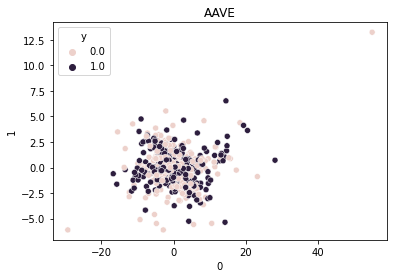

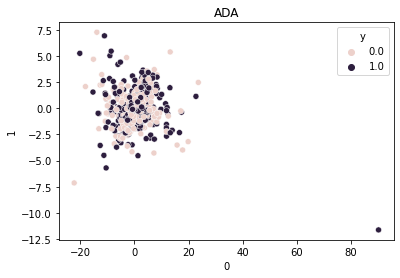

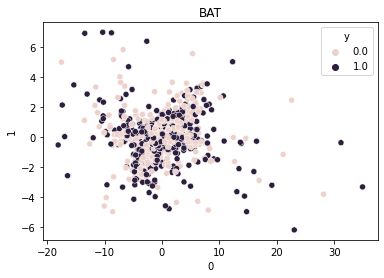

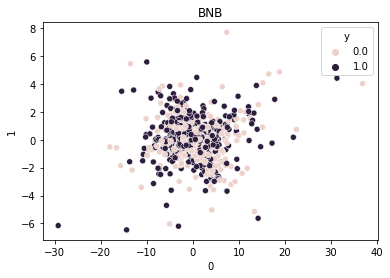

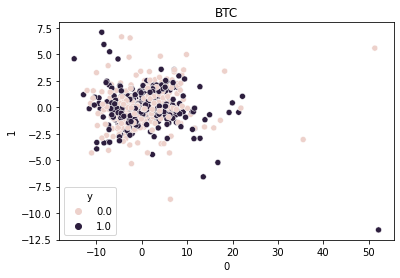

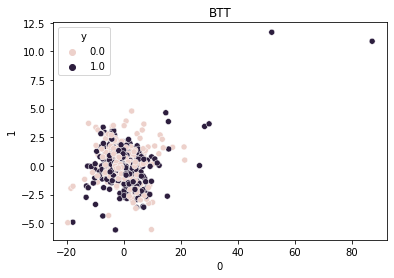

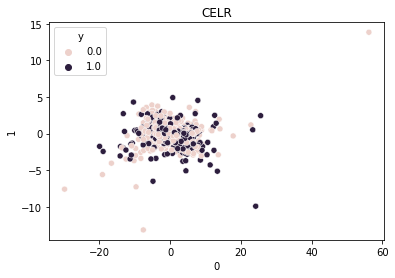

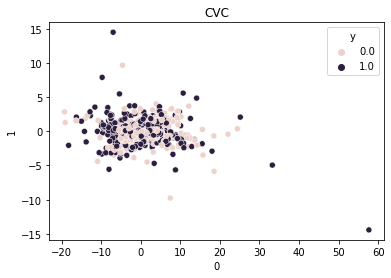

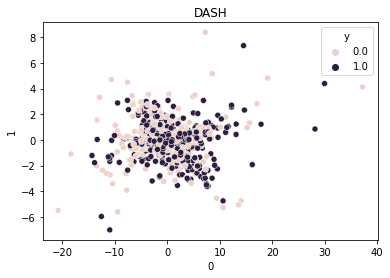

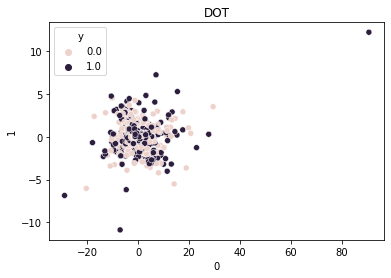

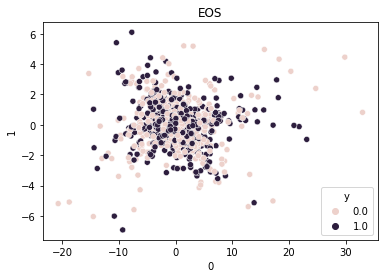

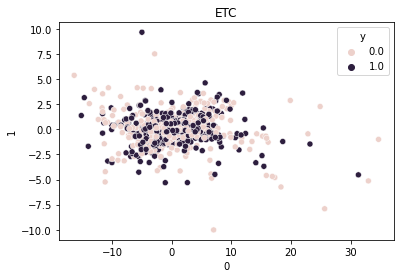

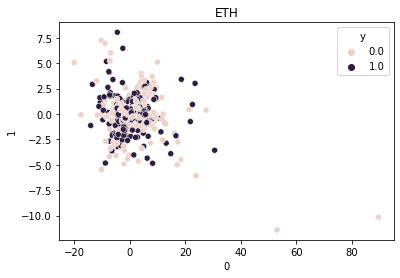

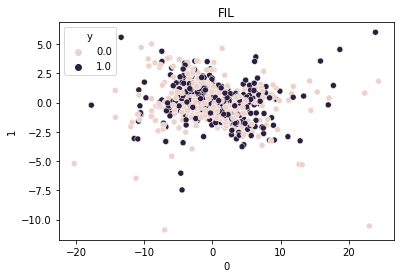

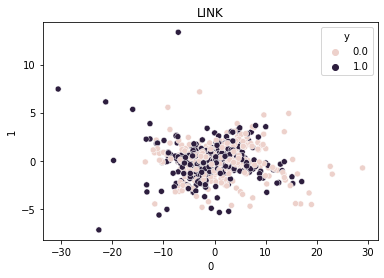

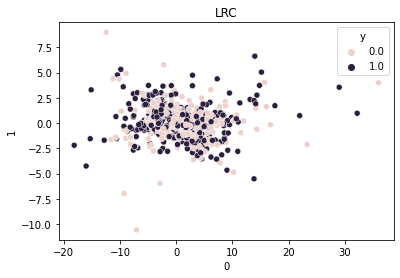

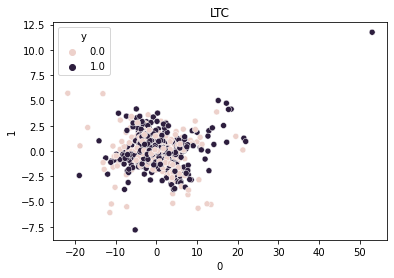

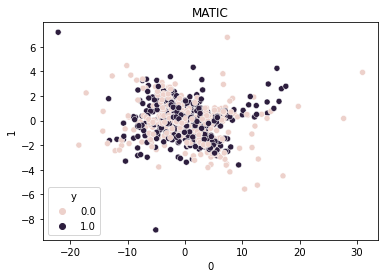

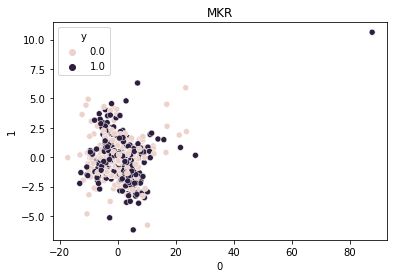

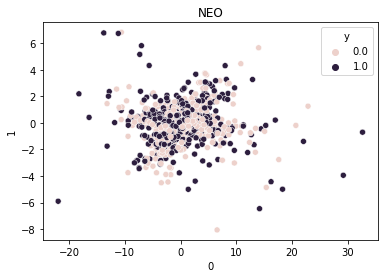

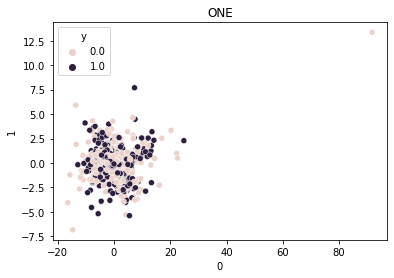

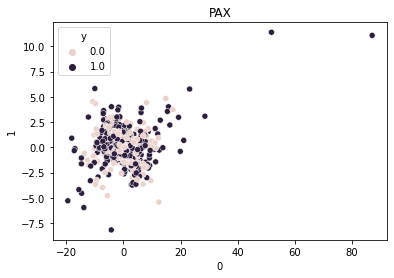

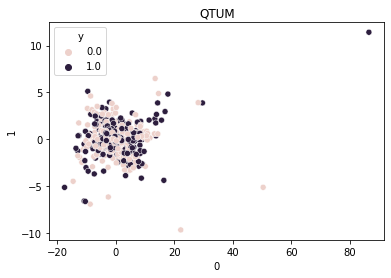

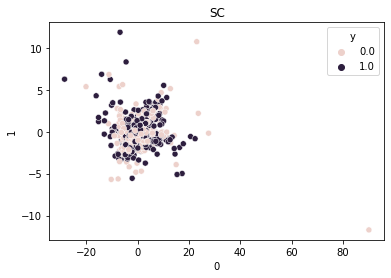

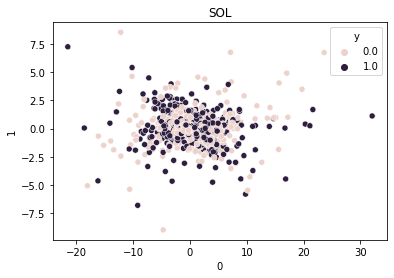

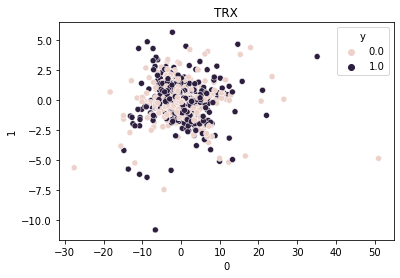

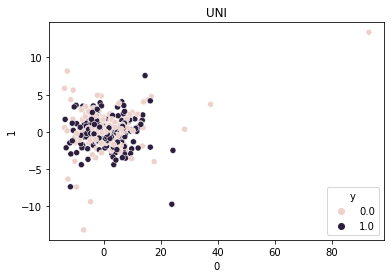

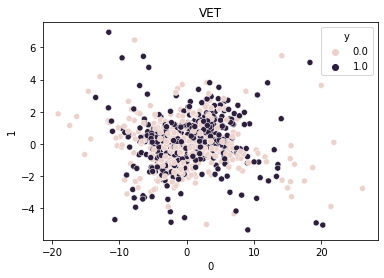

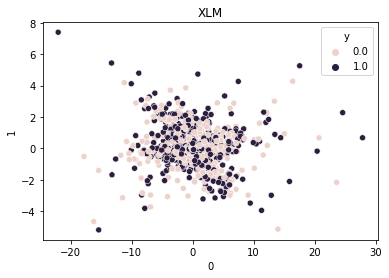

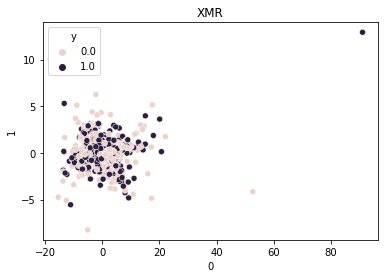

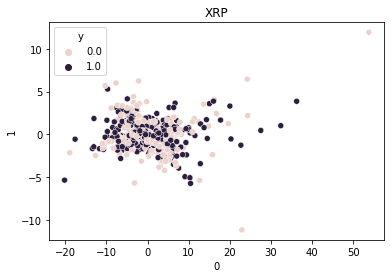

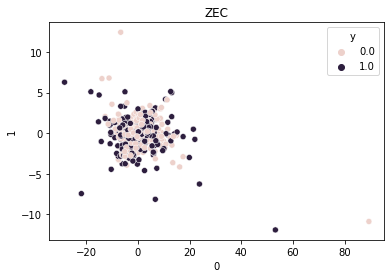

In [26]:
counter2=0

for coin, df in ml_dfs.items():
    X=df.copy()
    X=X.drop(['y'], axis='columns')
    y=df['y']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)
    
    key_counter=coins_keys[counter2]
    Xtest_dfs[key_counter]=Xtest.copy()
    ytest_dfs[key_counter]=ytest.copy()
    
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain=scaler.transform(Xtrain)
    pca=PCA(n_components=2)
    pca.fit(Xtrain)
    Xtrain_2n=pca.transform(Xtrain)
    Xtrain_2n=pd.DataFrame(Xtrain_2n)
    
    sns.scatterplot(x=Xtrain_2n[0], y=Xtrain_2n[1], hue=ytrain).set(title=key_counter)
    plt.show()
    
    counter2+=1
    
    auc_roc_scores ={'knc':None,
                 'rfc':None,
                 'gnb':None,
                 'xgb':None}
    
    model_keys=['knc','rfc','gnb','xgb']
    counter=0
    

    for model in models:
        cv_results=cross_validate(model, Xtrain, ytrain, scoring= 'roc_auc' )
        key_place=model_keys[counter]
        auc_roc_scores[key_place]=(cv_results['test_score'].mean())
        counter+=1
    
    scores_df = scores_df.append(auc_roc_scores, ignore_index=True)

In [27]:
scores_df['coin']=coins_keys

In [28]:
column_n = scores_df.pop('coin')
scores_df.insert(0, 'coin', column_n)

In [29]:
scores_df

,coin,knc,rfc,gnb,xgb
0,AAVE,0.521114,0.520621,0.520357,0.500583
1,ADA,0.516488,0.514907,0.522932,0.509823
2,BAT,0.498876,0.518010,0.495459,0.516957
3,BNB,0.516090,0.514160,0.483560,0.524892
4,BTC,0.523141,0.520719,0.513963,0.528466
5,BTT,0.507242,0.524933,0.488446,0.507665
6,CELR,0.482132,0.522130,0.506797,0.524226
7,CVC,0.503767,0.513145,0.514280,0.506743
8,DASH,0.527453,0.523425,0.506736,0.523726
9,DOT,0.509610,0.548095,0.524051,0.526927


In [30]:
scores_df=pd.melt(scores_df, id_vars=['coin'], value_vars=['knc','rfc','gnb','xgb'])
scores_df

,coin,variable,value
0,AAVE,knc,0.521114
1,ADA,knc,0.516488
2,BAT,knc,0.498876
3,BNB,knc,0.516090
4,BTC,knc,0.523141
...,...,...,...
123,VET,xgb,0.529487
124,XLM,xgb,0.499326
125,XMR,xgb,0.506298
126,XRP,xgb,0.515377


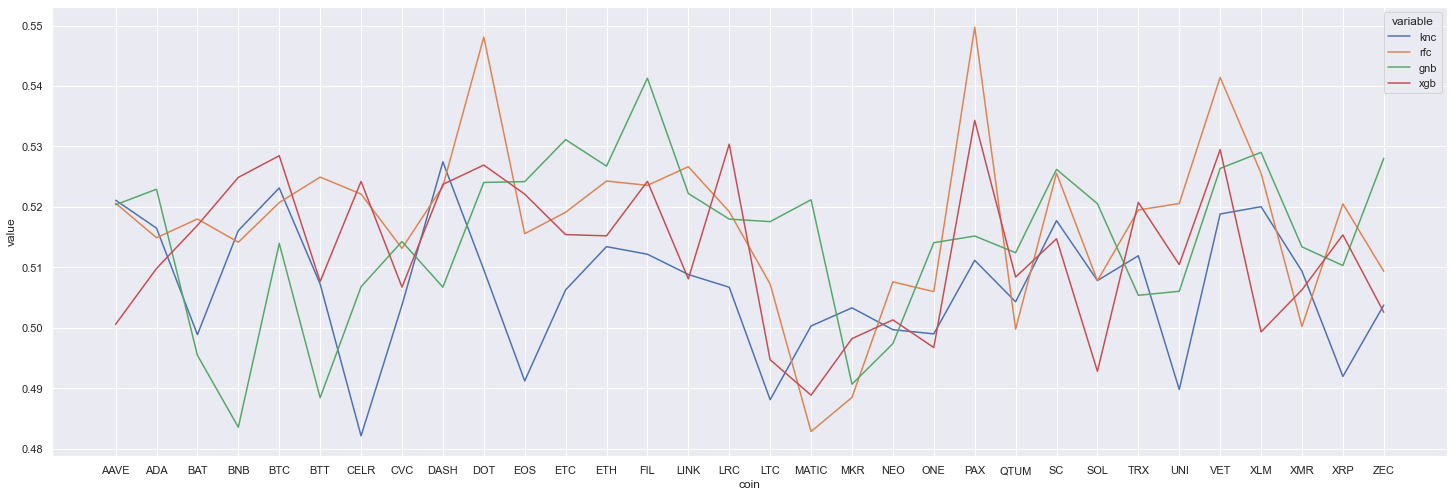

In [31]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.lineplot(x=scores_df['coin'], y=scores_df['value'], hue=scores_df['variable'])
plt.show()

It appeared that the random forest classifier applied to the PAX coin had the highest predictive score according to the AUROC score. Therefore, I split the test dataset of the PAX coin into a training dataset and testing dataset, standardized both datasets using a standard scaler fitted to the test dataset. I then applied a random search of a number of hyperparameters specific to the random forest classifier to tune the model using cross validation. I then applied these hyperparameters, trained the model on the training dataset and predicted the outcomes for the test dataset to determine what the AUROC score was. I then trained the model on the full PAX dataset and assigned it to trained_model.

In [32]:
X=Xtest_dfs['PAX']
y=ytest_dfs['PAX']
y=pd.DataFrame(y)

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [34]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [35]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [36]:
n_estimators=[int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(100, 110, num=11)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True, False]

random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}
rfc_random=RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
ytrain=np.ravel(ytrain)
rfc_random.fit(Xtrain, ytrain)
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 106, 'bootstrap': True}


In [37]:
ytrain=np.ravel(ytrain)

In [38]:
params=rfc_random.best_params_
rfc=RandomForestClassifier(**params)
rfc.fit(Xtrain, ytrain)
yprediction=rfc.predict(Xtest)
print(roc_auc_score(ytest, yprediction))

0.5239191911238837


In [39]:
df_final=ml_dfs['PAX'].copy()
Xfinal=df_final.drop(['y'], axis='columns')
yfinal=df_final['y']

Xfinal=scaler.transform(Xfinal)

trained_model=rfc.fit(Xfinal, yfinal)


## Discussion

Most of the models on most of the coins appeared to have AUROC scores of around 0.5. An AUROC score of 0.5 is as good as random chance and so these models cannot be of any use. Despite appearing to be useable as a predictive dataset and model combination, after tuning it appears that the a random forest classifier fitted to the PAX training dataset and then tested on the the test dataset does no better than random chance. I am not surprised by this as the cryptocurrency markets are very complex and sensitive to external factors which may not have been included in the imported dataset. Fortunately, this project was done to exhibit my skills of working with data and the final outcome was no more than an idle curiosity. Having said that though, there are a number of avenues to explore which may increase the model's ability to make correct predictions, including:

1. Including price changes from other sources outside of the cryptocurrency sphere.
2. Including price changes further back in time of the coins that are in the dataset.
3. Shortening or lengthening the period which the price change occurs over.


#### Including price changes from other sources outside of the cryptocurrency sphere

Research papers indicate that there is a relationship between the price change of gold and certain stock market indexes (liek teh NASDAQ 100) and the price change of certain coins. It would be worthwhile to include the price changes of these other factors to determine whether they improve predicitive ability. 

#### Including price changes further back in time of the coins that are in the dataset

The current dataset only includes price changes over the previous hour. It may be worthwhile to include the price change of the data of the coins for the hour before that, or even for multiple hours before that. One could also include price changes over the previous two hours as a single price change.

#### Shortening or lengthening the period which the price change occurs over

The current datasets depict how the price change over each hour time period, but the price will fluctuate within that hour. It may be that there is a stronger relationship between price changes over successive minutes (or even seconds) than over successive hours. If so, a model should be better able to predict price changes from minute to minute or second to second and so it may be worthwhile to perform the above data analysis and model training on data of shorter time periods.